In [130]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats as stats
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
%matplotlib inline

In [131]:
SEED = 27

In [132]:
df = pd.read_csv('../data/churn.csv')
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


# Basic Data Analysis

In [133]:
df['churn'].value_counts()

False    2850
True      483
Name: churn, dtype: int64

In [169]:
df['churn'].value_counts(normalize=True)

False    0.855086
True     0.144914
Name: churn, dtype: float64

In [134]:
df.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

In [135]:
df.isna().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [136]:
df.duplicated().sum()

0

<AxesSubplot:>

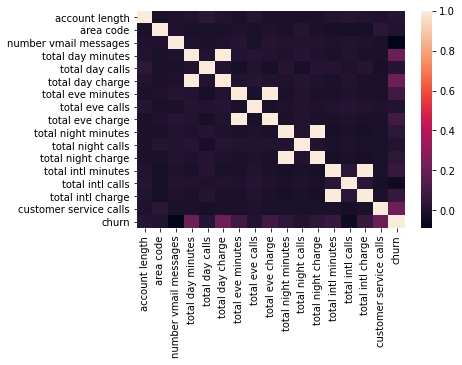

In [137]:
sns.heatmap(df.corr().round(2))

No duplicates or null values to worry about

# Preprocessing

Now we need to convert the string columns to something numerical to use

In [138]:
#switching international_plan to int
df['international plan'] = df['international plan'].map({'yes': 1, 'no': 0})
df['international plan']

0       0
1       0
2       0
3       1
4       1
       ..
3328    0
3329    0
3330    0
3331    1
3332    0
Name: international plan, Length: 3333, dtype: int64

In [139]:
#switching voice mail plan to int
df['voice mail plan'] = df['voice mail plan'].map({'yes': 1, 'no': 0})
df['voice mail plan']

0       1
1       1
2       0
3       0
4       0
       ..
3328    1
3329    0
3330    0
3331    0
3332    1
Name: voice mail plan, Length: 3333, dtype: int64

Label Encoding

In [140]:
label_encoder = LabelEncoder()
df["area code"] = label_encoder.fit_transform(df['area code'])
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,1,382-4657,0,1,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,1,371-7191,0,1,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,1,358-1921,0,0,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,0,375-9999,1,0,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,1,330-6626,1,0,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [141]:
df['area code'].value_counts()

1    1655
2     840
0     838
Name: area code, dtype: int64

One Hot Encoding

In [142]:
encoder = OneHotEncoder(sparse=False)
encoded_data = encoder.fit_transform(df[['state']])
encoded_data

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [143]:
encoded_df = pd.DataFrame(encoded_data, columns=encoder.categories_[0])
encoded_df

,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3329,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3330,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3331,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [144]:
df.drop('state', axis=1, inplace=True)
df = pd.concat([df, encoded_df], axis=1)
df.head()

,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
0,128,1,382-4657,0,1,25,265.1,110,45.07,197.4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,107,1,371-7191,0,1,26,161.6,123,27.47,195.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,137,1,358-1921,0,0,0,243.4,114,41.38,121.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,84,0,375-9999,1,0,0,299.4,71,50.90,61.9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,75,1,330-6626,1,0,0,166.7,113,28.34,148.3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Drop phone number

In [145]:
df.drop('phone number', axis=1, inplace=True)
df.head()

,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
0,128,1,0,1,25,265.1,110,45.07,197.4,99,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,107,1,0,1,26,161.6,123,27.47,195.5,103,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,137,1,0,0,0,243.4,114,41.38,121.2,110,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,84,0,1,0,0,299.4,71,50.90,61.9,88,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,75,1,1,0,0,166.7,113,28.34,148.3,122,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


setting X and y

In [146]:
X = df.drop('churn', axis=1)
y = df['churn']

train test split

In [147]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)
print(X_new.shape)
print(X_train.shape)
print(X_test.shape)
print(y.shape)
print(y_train.shape)
print(y_test.shape)

(3333, 69)
(2666, 69)
(667, 69)
(3333,)
(2666,)
(667,)


In [148]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Data Modeling

### Creating the LogisticalRegression Model

In [149]:
model1 = LogisticRegression()

In [150]:
model1.fit(X_train, y_train)
model1

LogisticRegression()

In [151]:
cv_results = cross_validate(estimator=model1, X=X_train, y=y_train, cv=5,
                            return_train_score=True)

In [152]:
cv_results['train_score'].mean()

0.8667475452748684

In [153]:
model1_score = cv_results['test_score'].mean()

In [154]:
def cv_overall(cv_results):
    val_results = cv_results['test_score']
    result_str = f'{val_results.mean():.3f} ± {val_results.std():.3f}'
    return result_str

In [155]:
cv_overall(cv_results)

'0.855 ± 0.005'

In [156]:
models = {}
models['model_1'] = {'model': model1, 'score':model1_score}

In [157]:
# Overall Training Score
model1.score(X_train,y_train)

0.8664666166541636

In [158]:
y_pred = model1.predict(X_test)
print("Accuracy : ",accuracy_score(y_test,y_pred))

Accuracy :  0.8680659670164917


### Decision Tree Time

In [159]:
model2 = DecisionTreeClassifier(random_state=SEED)
model2.fit(X_train, y_train)

DecisionTreeClassifier(random_state=27)

In [160]:
# Accuracy on training data & test data
print('Training:', model2.score(X_train, y_train))

cv_results = cross_validate(estimator=model2, X=X_train, y=y_train, cv=5,
                            return_train_score=True)

Training: 1.0


In [161]:
model2_score = cv_results['test_score'].mean()
models['model_2'] = {'model': model2, 'score':model2_score}
model2_score

0.9062215851199135

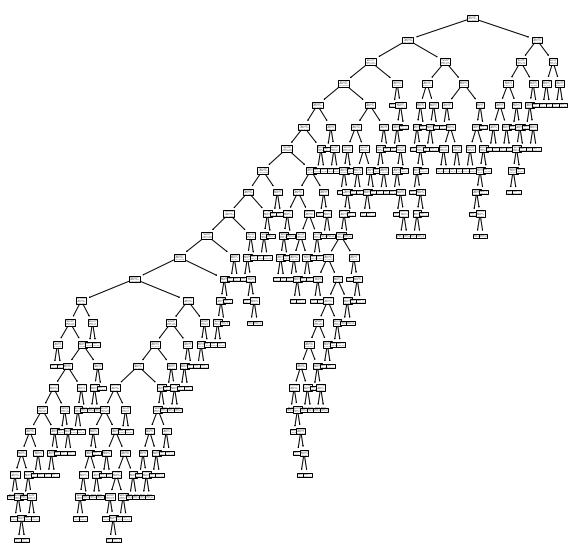

In [162]:
f, ax = plt.subplots(figsize=(10, 10))
plot_tree(model2, ax=ax);

#### Tuning Hyperparameters

In [163]:
model2_tuned = DecisionTreeClassifier(max_depth=10, min_samples_split=5, min_samples_leaf=2, random_state=SEED)
model2_tuned.fit(X_train, y_train)
# Accuracy on training data & test data
print('Training:', model2_tuned.score(X_train, y_train))
print('Testing:', model2_tuned.score(X_test, y_test))

Training: 0.9737434358589647
Testing: 0.9400299850074962


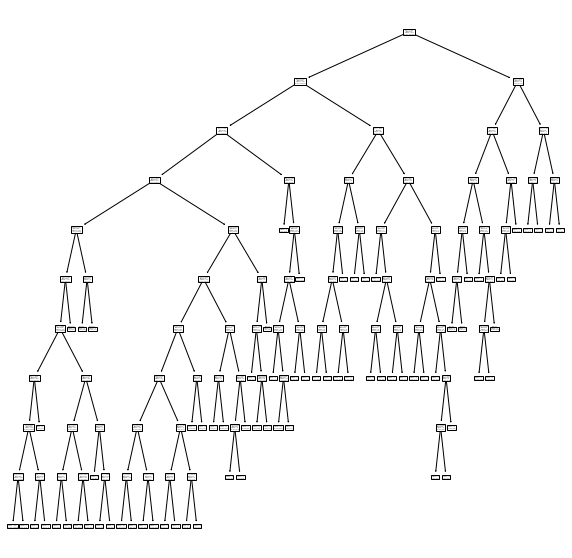

In [168]:
f, ax = plt.subplots(figsize=(10, 10))
plot_tree(model2_tuned, ax=ax);

In [164]:
cv_results = cross_validate(estimator=model2_tuned, X=X_train, y=y_train, cv=5,
                            return_train_score=True)

In [165]:
model2_tuned_score = cv_results['test_score'].mean()
models['model2_tuned'] = {'model': model2_tuned, 'score':model2_tuned_score}
model2_tuned_score

0.9294783959075545

In [167]:
models

{'model_1': {'model': LogisticRegression(), 'score': 0.8548369416278433},
 'model_2': {'model': DecisionTreeClassifier(random_state=27),
  'score': 0.9062215851199135},
 'model2_tuned': {'model': DecisionTreeClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=5,
                         random_state=27),
  'score': 0.9294783959075545}}

Best model score is model2_tuned

In [ ]:
y_pred3 = model2_tuned.predict(X_test)
print("Accuracy : ",accuracy_score(y_test,y_pred3))
print("Recall : ",recall_score(y_test,y_pred3))
print("F1 score : ",f1_score(y_test,y_pred3))
print("Precision : ",precision_score(y_test,y_pred3))

Accuracy :  0.9400299850074962
Recall :  0.7625
F1 score :  0.7530864197530863
Precision :  0.7439024390243902


## EDA

In [185]:
feature_importances = dict(zip(X.columns, model2_tuned.feature_importances_))

In [186]:
feature_importances = dict(sorted(feature_importances.items(), key=lambda item: item[1], reverse=True))

In [187]:
feature_importances = dict(list(feature_importances.items())[0: 10])

In [188]:
feature_importances

{'total day minutes': 0.17918388126107548,
 'total day charge': 0.12635181949956692,
 'customer service calls': 0.12370943017608262,
 'total intl minutes': 0.09898677264470206,
 'international plan': 0.09484754770714562,
 'total intl calls': 0.07693778392545696,
 'number vmail messages': 0.07095156617247637,
 'total eve minutes': 0.06847843865249928,
 'total eve charge': 0.06054112701195168,
 'total night charge': 0.023650099131507157}

<BarContainer object of 10 artists>

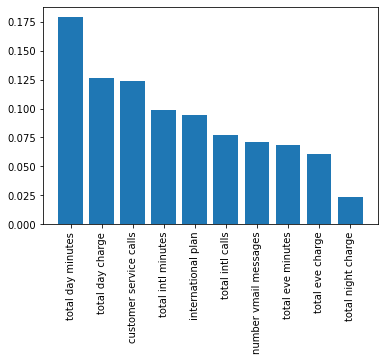

In [201]:
plt.xticks(rotation=90)
plt.bar(feature_importances.keys(), feature_importances.values())

<AxesSubplot:xlabel='churn', ylabel='total day minutes'>

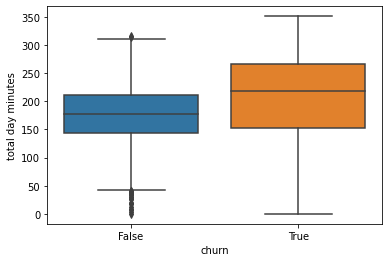

In [191]:
sns.boxplot(x = df['churn'], y = df['total day minutes'])

<BarContainer object of 10 artists>

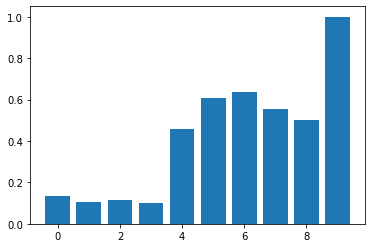

In [199]:
df2 = df.groupby('customer service calls').agg({'total day charge': 'count', 'churn': 'sum'})
df2['churn_percent'] = df2['churn'] / df2['total day charge']
plt.bar(df2.index, df2['churn_percent'])